## Maksimowicz Martyna

# PROJEKT

## Klasyfikacja ziaren fasoli

##### Wczytanie potrzebnych bibliotek

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import imageio as im
from scipy.stats import shapiro
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import naive_bayes as nb
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

### Charakterystyka danych – problem

Zbiór danych „Dry Bean Dataset” pochodzący z repozytorium UCI Machine Learning Repository. (Źródło: https://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset).

Fasola to jedno z najczęściej produkowanych roślin strączkowych w Turcji. Odgrywa zatem kluczową rolę w rolnictwie. Jednocześnie jest wrażliwa na wpływ zmian klimatycznych. 

Odporność i/lub tolerancję roślin na czynniki zewnętrzne można zwiększyć poprzez hodowlę nowych odmian i określenie cech ich nasion.

Jakość nasion ma zdecydowanie wpływ na produkcję roślinną. Dlatego też klasyfikacja nasion ma zasadnicze znaczenie dla powodzenia uprawy (oraz marketingu).

W Turcji uprawiane nasiona fasoli dzieli się na odmiany, biorąc pod uwagę cechy formy czy kształtu.

Wykonano zdjęcia 13 611 ziaren 7 różnych odmian fasoli o podobnych cechach za pomocą kamery o wysokiej rozdzielczości. Obrazy poddano etapom segmentacji i ekstrakcji cech.

Automatyczna identyfikacja ziaren fasoli miała pomoc rolnikom w procesie technologicznym, ponieważ ręczna klasyfikacja i sortowanie nasion to proces trudny, bardzo czasochłonny i o niskiej efektywności, zwłaszcza przy dużych nakładach produkcyjnych.


#### Badane odmiany fasoli:
- Seker – 2027 obiektów,
- Barbunya – 1322 obiektów,
- Bombay – 522 obiektów,
- Cali – 1630 obiektów,
- Dermason – 3546 obiektów,
- Horoz – 1928 obiektów,
- Sira – 2636 obiektów.

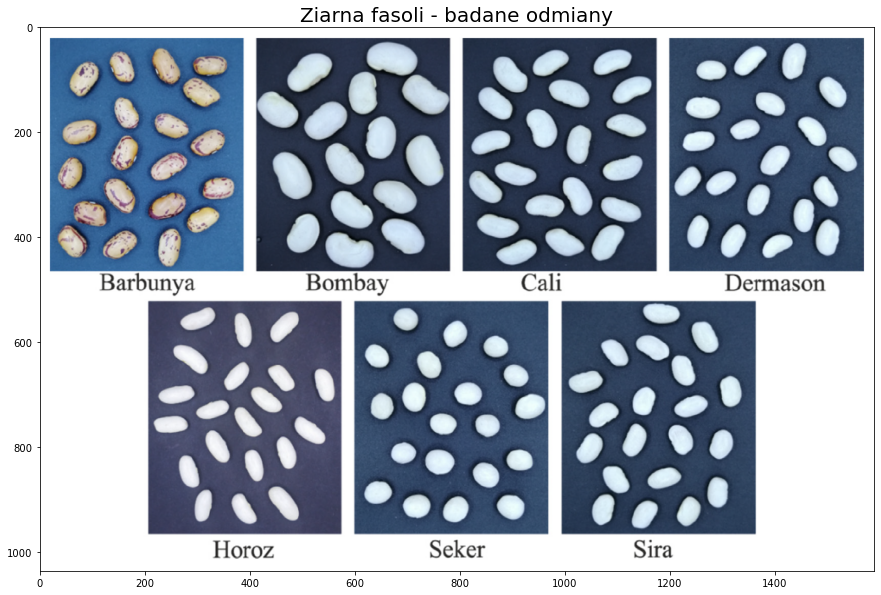

In [2]:
img = im.imread('ziarna fasoli.png')
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
plt.title('Ziarna fasoli - badane odmiany',fontsize=20)
plt.imshow(img)

#### Cechy wyodrębnione ze zdjęć:
- Area 𝐴(Pole) – obszar strefy fasoli i liczba pikseli w jej granicach
- Perimeter 𝑃 (Obwód) – obwód ziarna fasoli (długość granicy)
- Major Axis Length 𝐿 (Długość osi głównej) – odległość między końcami najdłuższej linii, którą można wyciągnąć z fasoli
- Minor Axis Length 𝑙 (Długość osi mniejszej) – najdłuższy odcinek, prostopadły do osi głównej
- Aspect Ratio 𝐾 (Współczynnik proporcji) – proporcja długości osi głównej do osi mniejszej 𝐾=𝐿/𝑙
- Eccentricity 𝐸𝑐 (Mimośród) – mimośród elipsy (stosunek długości ogniskowej do długości półosi wielkiej)
- Convex Area 𝐶 (Obszar wypukły) – liczba pikseli w najmniejszym wielokącie wypukłym, zawartym w obszarze ziarna fasoli
- Equivalent Diameter 𝐸𝑑 (Średnica ekwiwalentna) – średnica koła o tej samej powierzchni, co obszar ziarna: 𝑑=√(4𝐴/𝜋)
- Extent 𝐸𝑥 (Zakres) – stosunek pikseli w obwiedni (minimalny prostokąt ograniczający) do powierzchni ziarna
- Solidity 𝑆 (Solidność) – wypukłość, stosunek pikseli w wypukłej łupinie do pikseli znajdujących się w całym ziarnie: 𝑆=𝐴/𝐶
- Roundness 𝑅 (Zaokrąglenie) – zaokrąglenie obiektu obliczane według następującego wzoru: 𝑅=(4∙𝜋∙𝐴)/𝑃^2 
- Compactness 𝐶𝑂 (Kompaktowość) – kompaktowość mierzy okrągłość obiektu według wzoru: 𝐶𝑂=𝐸𝑑/𝐿
- Shape Factors (Współczynniki kształtu) – bezwymiarowe wielkości używane w analizie obrazu, które liczbowo opisują kształt obiektu, niezależnie od jego wymiarów. Współczynniki kształtu są obliczane na podstawie zmierzonych wymiarów, takich jak średnica, długość cięciwy, powierzchnia, obwód, środek ciężkości, momenty itp. Znormalizowane wielkości reprezentują stopień odchylenia od idealnego kształtu, takiego jak okrąg, kula lub wielościan równoboczny
    - Shape Factor 1: 𝑆𝐹1=𝐿/𝐴
    - Shape Factor 2: 𝑆𝐹2=𝑙/𝐴
    - Shape Factor 3: 𝑆𝐹3=𝐴/((𝐿/2)^2∙𝜋)
    - Shape Factor 4: 𝑆𝐹4=𝐴/(𝐿/2∙𝑙/2∙𝜋)


### Proces analizy zbioru danych:
- Wstępna analiza danych 
    - Przegląd próbki danych
    - Wstępna wizualizacja zmiennych z uwzględnieniem klas
- Podział danych na zbiory: treningowy i testowy w proporcji 75% i 25%
- Standaryzacja cech
- Wybór klasyfikatorów i ustalenie optymalnych parametrów
- Wytrenowanie modeli
- Predykcja wartości
- Zbadanie jakości klasyfikacji

##### Wczytanie danych

In [3]:
data1 = pd.read_excel('Dry_Bean_Dataset.xlsx')
display(data1)

columns = data1.columns
X_columns = data1.columns[:-1]
Y_column = data1.columns[-1]

X = pd.DataFrame(data1, columns=X_columns)

Y = data1[Y_column]
Y = Y.values.ravel()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0          0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1          0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2          0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3          0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4          0.333680       30417     195.896503  0.773098  0.990893   0.984877   
...             ...         ...            ...       ...       ...        ...   
13606      0.765002       42508     231.515799  0.714574  0.990331   0.916603   
13607      0.735702       42494     231.526798  0.799943  0.990752   0.922015   
13608      0.734065       42569     231.631261  0.729932  0.989899   0.918424   
13609      0.741055       42667     231.653248  0.705389  0.987813   0.907906   
13610      0.786693       42600     231.686223  0.788962  0.989648   0.888380   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
0         0.913358      0.007332      0.003147      0.834222      0.998724   
1         0.953861      0.006979      0.003564      0.909851      0.998430   
2         0.908774      0.007244      0.003048      0.825871      0.999066   
3         0.928329      0.007017      0.003215      0.861794      0.994199   
4         0.970516      0.006697      0.003665      0.941900      0.999166   
...            ...           ...           ...           ...           ...   
13606     0.801865      0.006858      0.001749      0.642988      0.998385   
13607     0.822252      0.006688      0.001886      0.676099      0.998219   
13608     0.822730      0.006681      0.001888      0.676884      0.996767   
13609     0.817457      0.006724      0.001852      0.668237      0.995222   
13610     0.784997      0.007001      0.001640      0.616221      0.998180   

          Class  
0         SEKER  
1         SEKER  
2         SEKER  
3         SEKER  
4         SEKER  
...         ...  
13606  DERMASON  
13607  DERMASON  
13608  DERMASON  
13609  DERMASON  
13610  DERMASON  

[13611 rows x 17 columns]

##### Przegląd próbki danych (0.1%)

In [4]:
X_prob, X_else, Y_prob, Y_else = train_test_split(X,Y,test_size=0.999, random_state=0)
X_prob.insert(16,'Class',Y_prob,True)
X_prob.to_excel("results/probka_danych.xlsx")
X_prob

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
705     37564    736.706       236.460206       202.526017      1.167555   
3468   155524   1523.825       559.756285       360.262951      1.553744   
6744    56334    989.798       372.724821       193.538983      1.925838   
5874    47605    877.296       373.143947       163.592869      2.280930   
4373    70563   1014.222       393.480116       229.372256      1.715465   
7891    40526    760.728       287.586063       180.454574      1.593676   
9225    46815    822.480       322.058459       185.829097      1.733090   
4859    77007   1069.231       411.552730       240.370821      1.712158   
13123   37832    720.476       263.034496       183.384980      1.434330   
3264    85890   1152.016       417.536420       262.719645      1.589285   
9845    51131    842.796       316.185620       207.028992      1.527253   
10799   27884    630.303       239.405409       148.484842      1.612322   
2732    70344   1037.985       378.651095       237.909773      1.591574   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
705        0.516162       38184     218.696068  0.766299  0.983763   0.869748   
3468       0.765356      159126     444.993603  0.817506  0.977364   0.841661   
6744       0.854620       57684     267.818365  0.674497  0.976597   0.722582   
5874       0.898771       48131     246.196199  0.630396  0.989071   0.777267   
4373       0.812521       71437     299.739223  0.717352  0.987765   0.862027   
7891       0.778632       41067     227.154806  0.684330  0.986826   0.880004   
9225       0.816741       47410     244.144853  0.698585  0.987450   0.869649   
4859       0.811712       78077     313.126744  0.660381  0.986296   0.846442   
13123      0.716887       38289     219.474824  0.725168  0.988064   0.915862   
3264       0.777232       87188     330.694035  0.714654  0.985113   0.813271   
9845       0.755828       51654     255.150958  0.812506  0.989875   0.904585   
10799      0.784425       28196     188.422428  0.758253  0.988935   0.881995   
2732       0.777964       71521     299.273725  0.821354  0.983543   0.820455   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
705       0.924875      0.006295      0.002841      0.855393      0.998718   
3468      0.794977      0.003599      0.000887      0.631989      0.981949   
6744      0.718542      0.006616      0.001088      0.516302      0.994315   
5874      0.659789      0.007838      0.000916      0.435321      0.992938   
4373      0.761765      0.005576      0.001158      0.580285      0.995459   
7891      0.789867      0.007096      0.001704      0.623890      0.994279   
9225      0.758076      0.006879      0.001401      0.574680      0.995971   
4859      0.760842      0.005344      0.001105      0.578881      0.991136   
13123     0.834396      0.006953      0.002079      0.696216      0.998603   
3264      0.792012      0.004861      0.001180      0.627284      0.996933   
9845      0.806966      0.006184      0.001618      0.651194      0.994537   
10799     0.787043      0.008586      0.002032      0.619437      0.998732   
2732      0.790368      0.005383      0.001296      0.624682      0.994227   

          Class  
705       SEKER  
3468     BOMBAY  
6744      HOROZ  
5874      HOROZ  
4373       CALI  
7891       SIRA  
9225       SIRA  
4859       CALI  
13123  DERMASON  
3264   BARBUNYA  
9845       SIRA  
10799  DERMASON  
2732   BARBUNYA

##### Badanie normalności rozkładów cech

In [5]:
czy_norm = []
for col in X_columns:     
    stats, p = shapiro(data1[col][::25])
    if p > 0.05:
        czy_norm.append('TAK')
    else:
        czy_norm.append('NIE')
rozklad = pd.DataFrame({'Zmienna': X_columns, 'Czy ma rozkład normalny?': czy_norm})
rozklad

Zmienna Czy ma rozkład normalny?
0              Area                      NIE
1         Perimeter                      NIE
2   MajorAxisLength                      NIE
3   MinorAxisLength                      NIE
4      AspectRation                      NIE
5      Eccentricity                      NIE
6        ConvexArea                      NIE
7     EquivDiameter                      NIE
8            Extent                      NIE
9          Solidity                      NIE
10        roundness                      NIE
11      Compactness                      NIE
12     ShapeFactor1                      NIE
13     ShapeFactor2                      NIE
14     ShapeFactor3                      NIE
15     ShapeFactor4                      NIE

Wniosek: Żadna cecha nie ma rozkładu normalnego.

##### Liczebności poszczególnych klas

In [6]:
class_names = list(set(Y))
class_names

['SEKER', 'DERMASON', 'HOROZ', 'CALI', 'BARBUNYA', 'BOMBAY', 'SIRA']

In [7]:
grouped = data1.groupby(data1.Class)
data_BARBUNYA = grouped.get_group("BARBUNYA")
data_BOMBAY = grouped.get_group("BOMBAY")
data_CALI = grouped.get_group("CALI")
data_DERMASON = grouped.get_group("DERMASON")
data_HOROZ = grouped.get_group("HOROZ")
data_SEKER = grouped.get_group("SEKER")
data_SIRA = grouped.get_group("SIRA")

liczebnosc = [len(grouped.get_group(el)) for el in class_names]
df_liczebn = pd.DataFrame({'Odmiana': class_names, 'Liczebność': liczebnosc})
df_liczebn = df_liczebn.sort_values('Odmiana')
display(df_liczebn)
df_liczebn.to_excel("results/Liczebnosci.xlsx")

Odmiana  Liczebność
4  BARBUNYA        1322
5    BOMBAY         522
3      CALI        1630
1  DERMASON        3546
2     HOROZ        1928
0     SEKER        2027
6      SIRA        2636

##### Wstępna wizualizacja - wykresy poszczególnych zmiennych z uwzględnieniem podziału na klasy

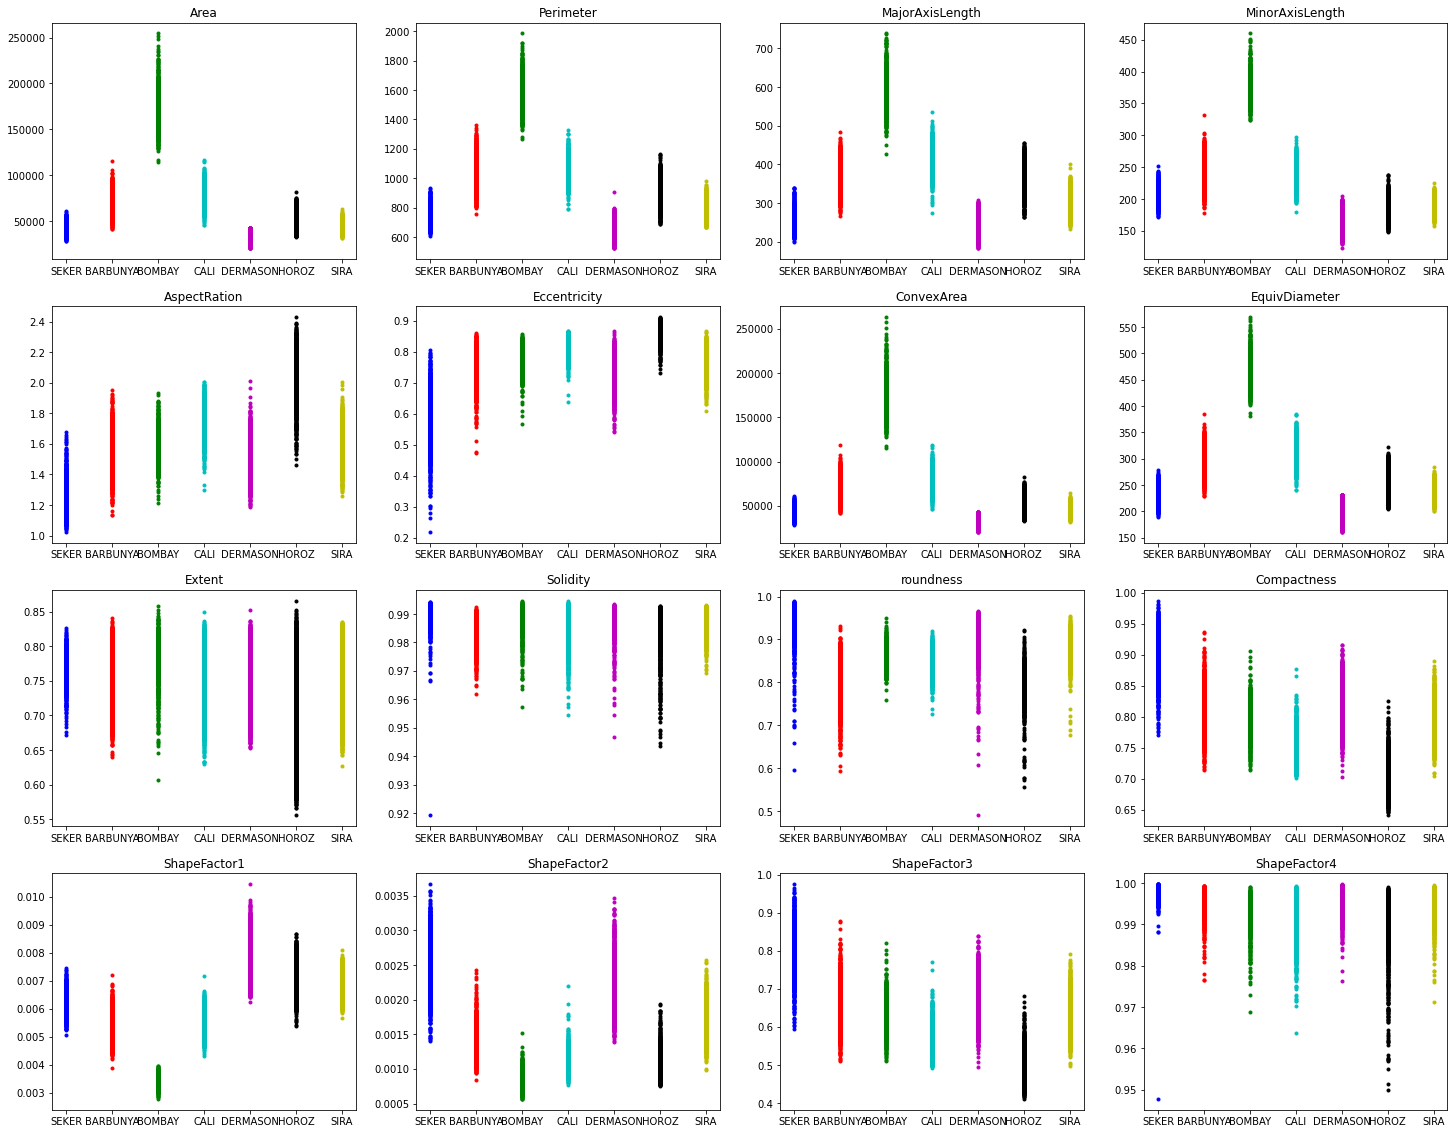

In [8]:
fig1, axs = plt.subplots(4,4)
fig1.set_size_inches(25, 20)
i,j=0,0
for col in X_columns:
    axs[i,j].plot(data_SEKER['Class'],data_SEKER[col],'.',color="b")
    axs[i,j].plot(data_BARBUNYA['Class'],data_BARBUNYA[col],'.',color="r")
    axs[i,j].plot(data_BOMBAY['Class'],data_BOMBAY[col],'.',color="g")
    axs[i,j].plot(data_CALI['Class'],data_CALI[col],'.',color="c")
    axs[i,j].plot(data_DERMASON['Class'],data_DERMASON[col],'.',color="m")
    axs[i,j].plot(data_HOROZ['Class'],data_HOROZ[col],'.',color="k")
    axs[i,j].plot(data_SIRA['Class'],data_SIRA[col],'.',color="y")
    axs[i,j].set_title(col)
    if j==3:
        i=i+1
        j=0
    else:
        j=j+1
plt.show()

##### Wstępna wizualizacja - wykresy zależności między poszczególnymi zmiennymi z uwzględnieniem podziału na klasy

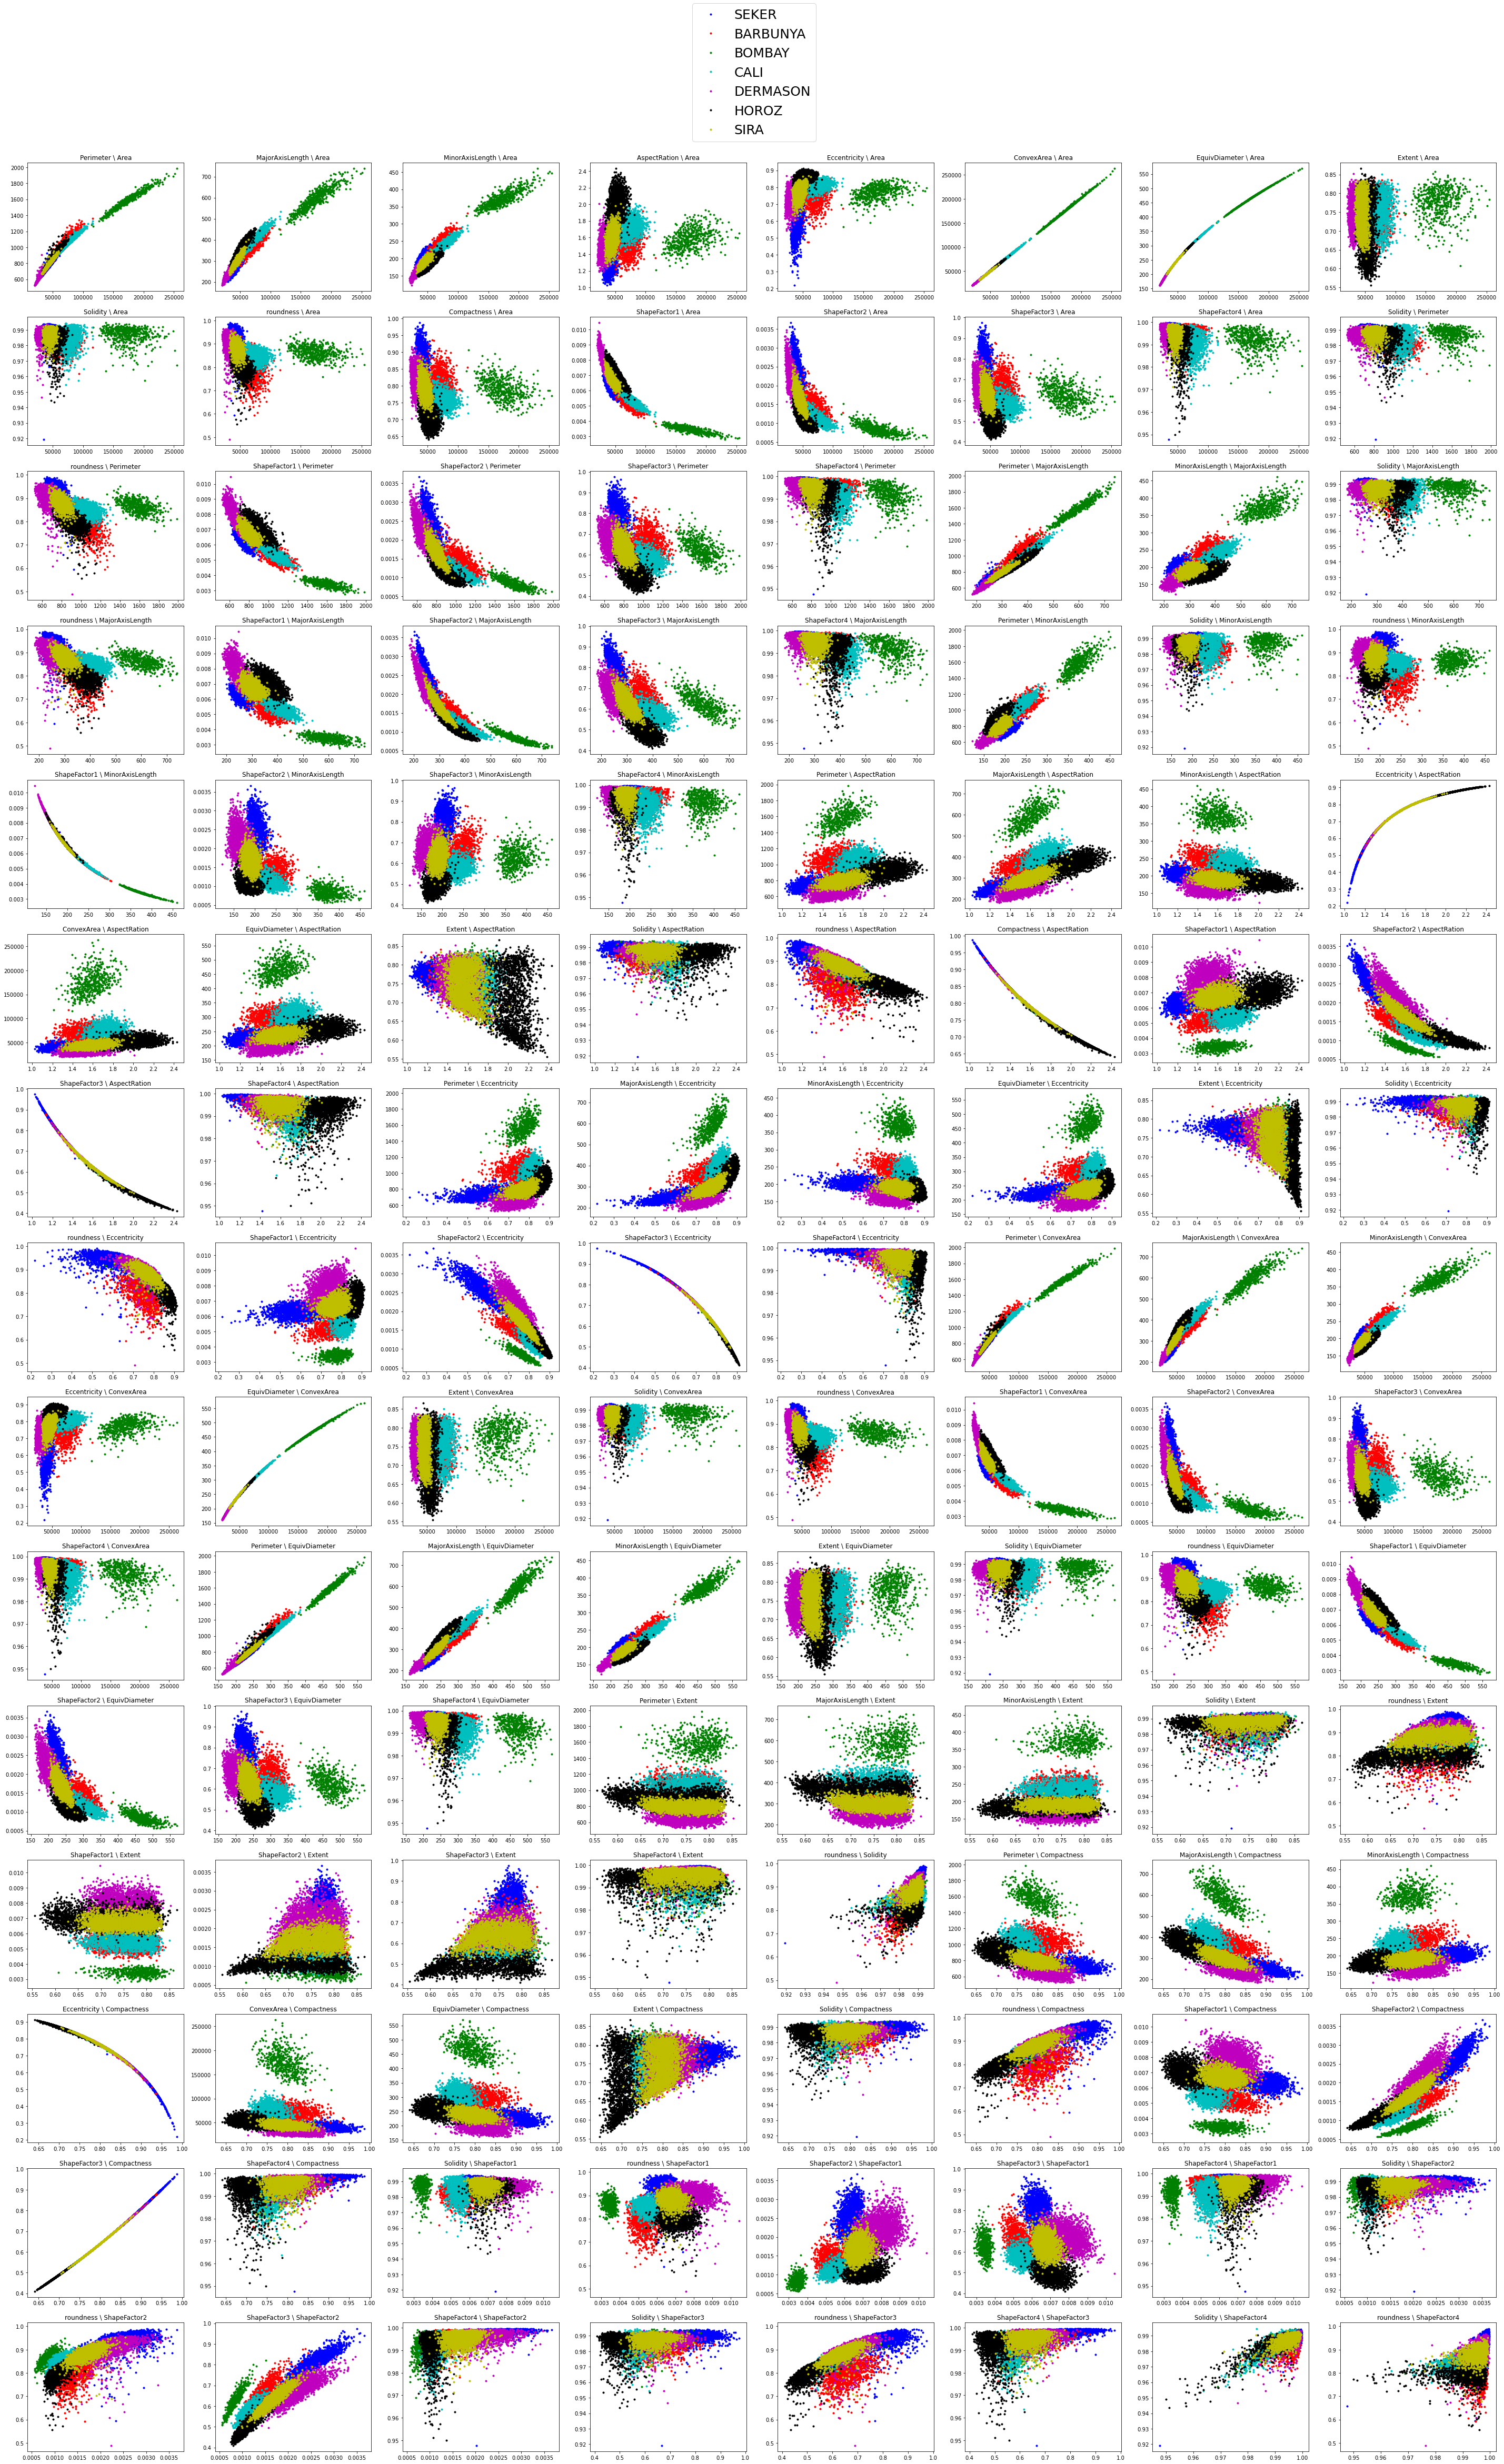

In [9]:
fig1, axs = plt.subplots(15,8)
fig1.set_size_inches(50, 80)
i,j=0,0
for col1 in X_columns:
    for col2 in X_columns:
        if col1<col2:
            title = str(col2)+' \ '+str(col1)
            axs[i,j].plot(data_SEKER[col1],data_SEKER[col2],'.',color="b",label='SEKER')
            axs[i,j].plot(data_BARBUNYA[col1],data_BARBUNYA[col2],'.',color="r",label='BARBUNYA')
            axs[i,j].plot(data_BOMBAY[col1],data_BOMBAY[col2],'.',color="g",label='BOMBAY')
            axs[i,j].plot(data_CALI[col1],data_CALI[col2],'.',color="c",label='CALI')
            axs[i,j].plot(data_DERMASON[col1],data_DERMASON[col2],'.',color="m",label='DERMASON')
            axs[i,j].plot(data_HOROZ[col1],data_HOROZ[col2],'.',color="k",label='HOROZ')
            axs[i,j].plot(data_SIRA[col1],data_SIRA[col2],'.',color="y",label='SIRA')
            axs[i,j].set_title(title)
            if j==7:
                i=i+1
                j=0
            else:
                j=j+1
                
plt.legend(bbox_to_anchor=(-4.25,18,1,1), loc='center', borderaxespad=0,fontsize=25)
plt.show()

Wniosek: Wykresy sugerują znaczne odstawanie odmiany BOMBAY. Możliwe, że łatwa do klasyfikacji będzie też odmiana HOROZ.

##### Podział danych na dane treningowe i testowe

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25, random_state=0)

##### Standaryzacja cech

In [11]:
# standaryzacja cech
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

# Wybór klasyfikatorów

Zbiór danych będzie badany za pomocą następujących klasyfikatorów:
- Metoda K najbliższych sąsiadów
- Naiwny klasyfikator bayesowski
- Metoda wektorów nośnych (SVM)
- Drzewo decyzyjne

W celu możliwie najlpeszej klasyfikacji, zostaną zbadane dokładności modeli w zależności od zastosowanych parametrów.

### Metoda K najbliższych sąsiadów
Badanie dokładności modelu w zależności od liczby sąsiadów k

liczba sasiadow  dokładność
35               36    0.928005
12               13    0.927711
28               29    0.927123
36               37    0.926829
30               31    0.926829
..              ...         ...
95               96    0.919189
92               93    0.918895
94               95    0.918601
0                 1    0.911842
1                 2    0.908316

[99 rows x 2 columns]

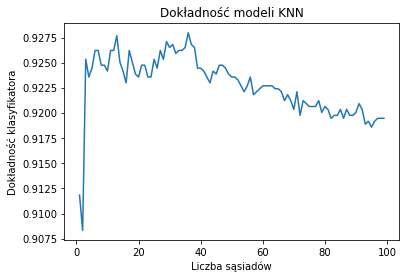

In [12]:
scores = []
sasiedzi = range(1,100)
for n in sasiedzi:
    m = KNeighborsClassifier(n_neighbors=n) # utworzenie modelu
    m.fit(X_train,Y_train) # trenowanie modelu
    m.predict(X_test) # przewidywanie wartości
    score = m.score(X_test,Y_test) # średnia dokładność modelu
    scores.append(score)
    
df_knn = pd.DataFrame({'liczba sasiadow': sasiedzi, 'dokładność': scores})
df_knn = df_knn.sort_values('dokładność',ascending=False)
display(df_knn)
df_knn.to_excel("results/KNN.xlsx")

# utworzenie wykresu
plt.plot(sasiedzi,scores)
plt.title("Dokładność modeli KNN")
plt.xlabel("Liczba sąsiadów")
plt.ylabel("Dokładność klasyfikatora")
plt.show()

#### Dla metody KNN wybrano n=36 sąsiadów, ponieważ dla tego parametru dokładność modelu jest najwyższa.

### Naiwny klasyfikator bayesowski
Badanie dokładności klasyfikatora bayesowskiego w zależności od rodzaju modelu

model  dokładność
0   Gaussian    0.900382
1  Bernoulli    0.723479

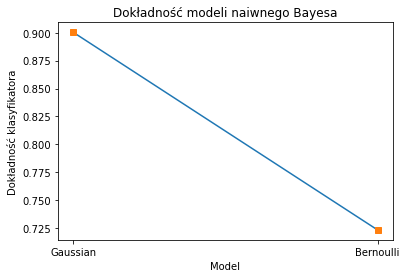

In [13]:
modele = [nb.GaussianNB(),nb.BernoulliNB()]
scores = []
model = ['Gaussian','Bernoulli']
for k in range(len(modele)):
    m = modele[k] # utworzenie modelu
    m.fit(X_train,Y_train) # trenowanie modelu
    m.predict(X_test) # przewidywanie wartości
    score = m.score(X_test,Y_test) # średnia dokładność modelu
    scores.append(score)
    
df_NB = pd.DataFrame({'model': model, 'dokładność': scores})
df_NB = df_NB.sort_values('dokładność',ascending=False)
display(df_NB)
df_NB.to_excel("results/NB.xlsx")

# utworzenie wykresu
plt.plot(df_NB['model'],df_NB['dokładność'])
plt.plot(df_NB['model'],df_NB['dokładność'],'s')
plt.title("Dokładność modeli naiwnego Bayesa")
plt.xlabel("Model")
plt.ylabel("Dokładność klasyfikatora")
plt.show()

#### Dla metody Naiwnego Bayesa wybrano model Gaussowski, ponieważ wówczas dokładność modelu jest najwyższa.

### Metoda wektorów nośnych (SVM)
Badanie dokładności modelu SVM w zależności od funkcji jądra

funkcja jądra  dokładność
2           rbf    0.931825
0        linear    0.926829
1          poly    0.910961
3       sigmoid    0.724655

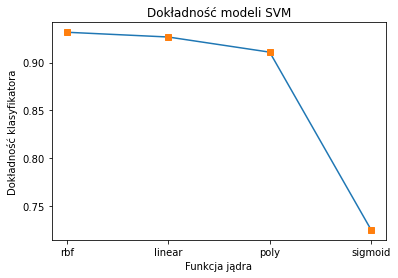

In [14]:
scores = []
kernel = ['linear','poly','rbf','sigmoid']
for k in kernel:
    m = SVC(kernel=k) # utworzenie modelu
    m.fit(X_train,Y_train) # trenowanie modelu
    m.predict(X_test) # przewidywanie wartości
    score = m.score(X_test,Y_test) # średnia dokładność modelu
    scores.append(score)
    
df_SVM = pd.DataFrame({'funkcja jądra': kernel, 'dokładność': scores})
df_SVM = df_SVM.sort_values('dokładność',ascending=False)
display(df_SVM)
df_SVM.to_excel("results/SVM.xlsx")

# utworzenie wykresu
plt.plot(df_SVM['funkcja jądra'],df_SVM['dokładność'])
plt.plot(df_SVM['funkcja jądra'],df_SVM['dokładność'],'s')
plt.title("Dokładność modeli SVM")
plt.xlabel("Funkcja jądra")
plt.ylabel("Dokładność klasyfikatora")
plt.show()

#### Dla metody  wektorów nośnych (SVM) wybrano funkcję jądra kernel=rbf, ponieważ dla tego parametru dokładność modelu jest najwyższa (rbf - radialna funkcja bazowa).

### Drzewo decyzyjne
Badanie dokładności drzewa decyzyjnego w zależności od maksymalnej głębokości

głębokość  dokładność
8           9    0.914781
6           7    0.910961
10         11    0.909492
9          10    0.908316
7           8    0.907728
5           6    0.905378
11         12    0.902439
12         13    0.899794
13         14    0.898913
15         16    0.898913
14         15    0.898325
4           5    0.885101
3           4    0.827799
2           3    0.787834
1           2    0.663826
0           1    0.423156

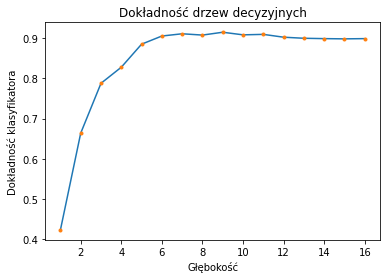

In [15]:
scores = []
N = range(1,len(columns))
for n in N:
    m = DecisionTreeClassifier(max_depth=n,random_state=0) # utworzenie modelu
    m.fit(X_train,Y_train) # trenowanie modelu
    m.predict(X_test) # przewidywanie wartości
    score = m.score(X_test,Y_test) # średnia dokładność modelu
    scores.append(score)

df_DT = pd.DataFrame({'głębokość': N, 'dokładność': scores})
df_DT = df_DT.sort_values('dokładność',ascending=False)
display(df_DT)
df_DT.to_excel("results/DT.xlsx")

# utworzenie wykresu
plt.plot(N,scores)
plt.plot(N,scores,'.')
plt.title("Dokładność drzew decyzyjnych")
plt.xlabel("Głębokość")
plt.ylabel("Dokładność klasyfikatora")
plt.show()

#### Dla metody drzewa decyzyjnego wybrano maksymalną głębokość max_depth=9, ponieważ dla tego parametru dokładność modelu jest najwyższa.

## Utworzenie wybranych modeli (najskuteczniejszych sposród swoich grup)

In [16]:
modele = [KNeighborsClassifier(n_neighbors=36),
         nb.GaussianNB(),
         SVC(kernel='rbf'),
         DecisionTreeClassifier(max_depth=9,random_state=0)]

modele_nazwy = ["KNN","Gaussowski NB","SVM","Drzewo decyzyjne"]

## Sprawdzian krzyżowy

In [17]:
# standaryzacja danych
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

# kroswalidacja
df_scores_cross_val = pd.DataFrame({'model': modele_nazwy})
i=1
for l_zb in [2,3,4,5,6,7,8,9,10]:
    scores = [cross_val_score(estimator=m, X=X_std, y=Y,cv=2) for m in modele]
    mean = [round(np.mean(score),l_zb) for score in scores]
    df_scores_cross_val.insert(i,l_zb,mean,True)
    i = i+1

display(df_scores_cross_val)
df_scores_cross_val.to_excel("results/Kroswalidacja.xlsx")

model     2      3       4        5         6         7  \
0               KNN  0.78  0.778  0.7778  0.77782  0.777825  0.777825   
1     Gaussowski NB  0.70  0.700  0.7005  0.70046  0.700457  0.700457   
2               SVM  0.69  0.692  0.6921  0.69208  0.692085  0.692085   
3  Drzewo decyzyjne  0.34  0.337  0.3372  0.33723  0.337225  0.337226   

          8         9        10  
0  0.777825  0.777825  0.777825  
1  0.700457  0.700457  0.700457  
2  0.692085  0.692085  0.692085  
3  0.337225  0.337225  0.337225

Wniosek: Maksymalne możliwe dokładności modeli występują przy podziale zbioru danych na 7 podzbiorów.

In [18]:
# zapamiętanie wartości dla kroswalidacji z podziałem na 7 podzbiorów
cross_val_7 = df_scores_cross_val[7]
cross_val_7 = cross_val_7.values.ravel()

###### Wytrenowanie modeli na zbiorze treningowym oraz predykcja wartości dla zbioru testowego

In [19]:
# trenowanie modeli
modele_fit = [m.fit(X_train,Y_train) for m in modele]
# przewidywanie wartości
Y_pred = [m.predict(X_test) for m in modele_fit]

###### Macierze błędów

In [20]:
# wypisanie macierzy błędów
macierz = [confusion_matrix(Y_test, y_pred) for y_pred in Y_pred]
for k in range(len(modele)):
    print(modele_nazwy[k],'- macierz błędów:')
    print()
    print(macierz[k])
    print()
    print()

KNN - macierz błędów:

[[276   0  25   0   2   5  11]
 [  0 111   0   0   0   0   0]
 [  7   0 402   0   6   1   3]
 [  1   0   0 847   1  14  42]
 [  0   0  11   2 469   0   9]
 [  2   0   0   2   0 446  20]
 [  1   0   1  69   7   3 607]]


Gaussowski NB - macierz błędów:

[[259   0  40   0   2   3  15]
 [  0 111   0   0   0   0   0]
 [ 35   0 377   0   5   1   1]
 [  0   0   0 808   2  19  76]
 [  0   0  10   4 469   0   8]
 [  2   0   0   3   0 442  23]
 [  4   0   1  57  18  10 598]]


SVM - macierz błędów:

[[287   0  20   0   1   3   8]
 [  0 111   0   0   0   0   0]
 [  9   0 401   0   5   1   3]
 [  0   0   0 849   1  11  44]
 [  1   0   9   3 469   0   9]
 [  1   0   0   5   0 448  16]
 [  1   0   1  69   6   5 606]]


Drzewo decyzyjne - macierz błędów:

[[277   0  20   0   3   6  13]
 [  1 110   0   0   0   0   0]
 [ 19   0 387   0   8   1   4]
 [  0   0   0 842   1  13  49]
 [  0   0  12   3 456   0  20]
 [  2   0   0  14   0 436  18]
 [  1   0   0  71   6   5 605]]




In [21]:
# L = len(X_test)
# poprawne_klas = []
# niepoprawne_klas = []
# udzial_poprawnych = []
# for k in range(len(modele)):
#     ii = [macierz[k][i][i] for i in range(len(macierz[k]))]
#     suma = sum(ii)   
#     poprawne_klas.append(suma)
#     niepoprawne_klas.append(L-suma)
#     udzial_poprawnych.append(suma/L*100)
    
# df_mac_bledow = pd.DataFrame({'Model': modele_nazwy, 
#                               'Liczba poprawnych klasyfikacji': poprawne_klas,
#                               'Liczba niepoprawnych klasyfikacji': niepoprawne_klas,
#                               'Udział poprawnych klasyfikacji [%]': udzial_poprawnych})
# display(df_mac_bledow)
# df_mac_bledow.to_excel("Macierz bledow podsumowanie.xlsx")

In [22]:
# generowanie raportów klasyfikacji
klasyfikacja = [classification_report(Y_test, y_pred) for y_pred in Y_pred]
for k in range(len(modele)):
    print(modele_nazwy[k],'- raport klasyfikacji:')
    print()
    print(klasyfikacja[k])
    print()
    print()

KNN - raport klasyfikacji:

              precision    recall  f1-score   support

    BARBUNYA       0.96      0.87      0.91       319
      BOMBAY       1.00      1.00      1.00       111
        CALI       0.92      0.96      0.94       419
    DERMASON       0.92      0.94      0.93       905
       HOROZ       0.97      0.96      0.96       491
       SEKER       0.95      0.95      0.95       470
        SIRA       0.88      0.88      0.88       688

    accuracy                           0.93      3403
   macro avg       0.94      0.94      0.94      3403
weighted avg       0.93      0.93      0.93      3403



Gaussowski NB - raport klasyfikacji:

              precision    recall  f1-score   support

    BARBUNYA       0.86      0.81      0.84       319
      BOMBAY       1.00      1.00      1.00       111
        CALI       0.88      0.90      0.89       419
    DERMASON       0.93      0.89      0.91       905
       HOROZ       0.95      0.96      0.95       491
       SEK

#### Wnioski:
- Odmiana Bombay została zaklasyfikowana poprawnie w 100% przez niemal wszystkie algorytmy (pojedynczy błąd dla modelu drzewa decyzyjnego)
- Wszystkie algorytmy najczęściej popełniały błąd przy klasyfikacji odmiany Sira. Co ciekawe, każdy algorytm najwięcej niepoprawnych klasyfikacji tej odmiany dokonał poprzez uznanie ziarna jako odmiana Dermason. Druga najliczniejsza grupa błędnych klasyfikacji dotyczyła odmiany Horoz.
- Dodatkowo, odmiana Dermason najczęściej błędnie była klasyfikowana jako odmiana Sira. Widać zatem, że odmiany te są bardzo zbliżone, biorąc pod uwagę cechy formy czy kształtu.
- Z kolei odmiana Horoz najczęściej błędnie była klasyfikowana jako odmiana Cali lub Sira.

In [23]:
# dokładność modeli
scores = []
for k in range(len(modele)):
    m = modele_fit[k]
    score = m.score(X_test,Y_test)
    scores.append(score)

df_dokl = pd.DataFrame({'Model': modele_nazwy, 'Dokładność': scores})
df_dokl = df_dokl.sort_values('Dokładność',ascending=False)
df_dokl

Model  Dokładność
2               SVM    0.931825
0               KNN    0.928005
3  Drzewo decyzyjne    0.914781
1     Gaussowski NB    0.900382

#### Wnioski:
- Najlepszy okazał się model wektorów nośnych, który uzyskał dokładność klasyfikacji na poziomie 93,18%.
- Wszystkie modele uzyskały dokładność ponad 90%.

## Wybór najistotniejszych cech
Badanie dokładności modeli w zależności od liczby wykorzystanych cech

In [24]:
# utworzenie i wytrenowanie obiektu drzewa losowego
forest = RandomForestClassifier(n_estimators=10000)
forest.fit(X_train,Y_train)
importances = forest.feature_importances_
X_train = pd.DataFrame(X_train, columns=X_columns)
X_test = pd.DataFrame(X_test, columns=X_columns)

# wybór najistotniejszych cech
sortowanie = pd.DataFrame({'Cecha': X_columns, 'Istotność': importances})
sortowanie = sortowanie.sort_values('Istotność',ascending=False)
nowa_kolejnosc = sortowanie['Cecha'].tolist()

display(sortowanie)

Cecha  Istotność
1         Perimeter   0.096709
14     ShapeFactor3   0.093901
11      Compactness   0.092935
12     ShapeFactor1   0.091289
3   MinorAxisLength   0.081248
2   MajorAxisLength   0.075732
6        ConvexArea   0.073060
5      Eccentricity   0.062519
4      AspectRation   0.061689
7     EquivDiameter   0.056287
0              Area   0.055752
10        roundness   0.054917
13     ShapeFactor2   0.042575
15     ShapeFactor4   0.031628
9          Solidity   0.018379
8            Extent   0.011380

Wniosek: Najistotniejszy w klasyfikacji jest obwód ziarna fasoli.

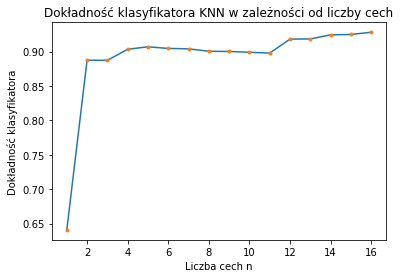

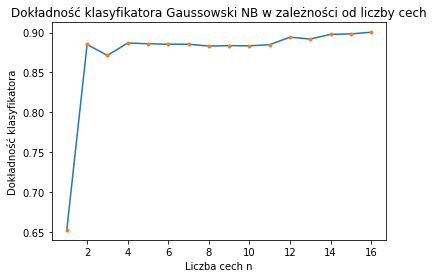

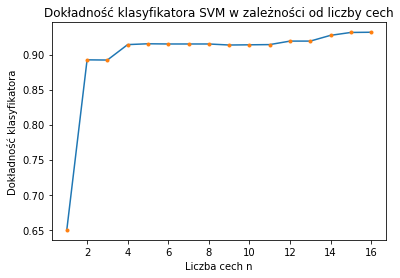

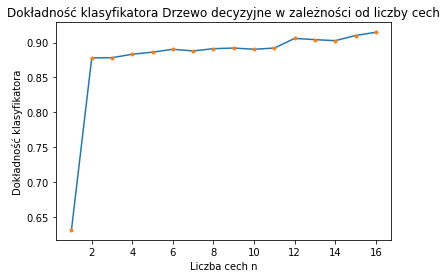

In [25]:
# utworzenie pętli dla modeli i wszystkich wartości n
dokladnosc2 = []
for m in range(len(modele)):
    dokl = []
    for n in range(1,17):
        cechy = [nowa_kolejnosc[i] for i in range(n)]
        X_train_transformed = X_train[cechy]
        X_test_transformed = X_test[cechy]
        model = modele[m].fit(X_train_transformed,Y_train)
        score = model.score(X_test_transformed,Y_test)
        dokl.append(score)
    dokladnosc2.append(dokl)
    
# utworzenie wykresów
for m in range(len(modele)):
    plt.plot(N,dokladnosc2[m])
    plt.plot(N,dokladnosc2[m],'.')
    plt.title('Dokładność klasyfikatora '+modele_nazwy[m]+' w zależności od liczby cech')
    plt.xlabel('Liczba cech n')
    plt.ylabel('Dokładność klasyfikatora')
    plt.show()

In [26]:
col_names = ['n='+str(i+1)+' cech' for i in range(len(N))]
df_dokl_cech = pd.DataFrame(dokladnosc2,index=modele_nazwy)
df_dokl_cech.columns=col_names
display(df_dokl_cech)
df_dokl_cech.to_excel("results/Dokladnosc od cech.xlsx")

n=1 cech  n=2 cech  n=3 cech  n=4 cech  n=5 cech  n=6 cech  \
KNN               0.640905  0.887452  0.887158  0.903321  0.906847  0.904496   
Gaussowski NB     0.652659  0.885101  0.871290  0.886865  0.885983  0.885395   
SVM               0.649721  0.892448  0.892154  0.914193  0.915369  0.915075   
Drzewo decyzyjne  0.631795  0.878049  0.878343  0.883338  0.886277  0.890391   

                  n=7 cech  n=8 cech  n=9 cech  n=10 cech  n=11 cech  \
KNN               0.903908  0.900382  0.900088   0.898913   0.897737   
Gaussowski NB     0.885395  0.883044  0.883632   0.883338   0.884808   
SVM               0.915075  0.915075  0.913606   0.913900   0.914193   
Drzewo decyzyjne  0.888040  0.891272  0.892154   0.890391   0.892154   

                  n=12 cech  n=13 cech  n=14 cech  n=15 cech  n=16 cech  
KNN                0.918014   0.918307   0.924185   0.924772   0.928005  
Gaussowski NB      0.894211   0.891860   0.897737   0.898325   0.900382  
SVM                0.919189   0.919189   0.927417   0.931531   0.931825  
Drzewo decyzyjne   0.905965   0.904202   0.902733   0.910079   0.914781

In [27]:
maksymalne = [max(dokladnosc2[i]) for i in range(len(modele_nazwy))]
indeks = [j for i in range(len(modele_nazwy)) for j in range(len(N)) if dokladnosc2[i][j]==maksymalne[i]]
df_maks = pd.DataFrame({'Maksymalna dokładność': maksymalne, 
                   'Liczba wykorzystanych cech': indeks,
                   'Średnia dokładność': scores,
                   'Kroswalidacja dla 7 podzbiorów': cross_val_7},                  
                   index=modele_nazwy)
df_maks = df_maks.sort_values('Maksymalna dokładność',ascending=False)
df_maks.to_excel("results/Maksymalna dokladnosc.xlsx")
display(df_maks)

Maksymalna dokładność  Liczba wykorzystanych cech  \
SVM                            0.931825                          15   
KNN                            0.928005                          15   
Drzewo decyzyjne               0.914781                          15   
Gaussowski NB                  0.900382                          15   

                  Średnia dokładność  Kroswalidacja dla 7 podzbiorów  
SVM                         0.931825                        0.692085  
KNN                         0.928005                        0.777825  
Drzewo decyzyjne            0.914781                        0.337226  
Gaussowski NB               0.900382                        0.700457

Wniosek: Dokładność każdego modelu rośnie wraz ze wzrostem liczby uwzględnianych cech. Zatem wszystkie cechy można uznać za istotne w procesie klasyfikacji. Nie należy usuwać żadnej ze zmiennych.

### Wnioski:
- Sprawdzian krzyżowy oszacował dokładność modeli znacznie gorzej niż faktycznie uzyskane wyniki. Kroswalidacja wskazała model K najbliższych sąsiadów jako najskuteczniejszy klasyfikator ze średnią dokładnością na poziomie 77,78%.
- Sprawdzian krzyżowy dla modelu drzewa decyzyjnego wskazał dokładność na poziomie zaledwie 33,72%.
- Wszystkie modele uzyskały dokładność ponad 90%.
- Najlepszy okazał się model wektorów nośnych, który uzyskał dokładność klasyfikacji na poziomie 93,18%.

Podsumowując, najlepsze modele to model SVM i model KNN. Zwracają poprawne wyniki z wysoką dokładnością. Jednakże wszystkie klasyfikatory osiągnęły dokładność klasyfikacji na poziomie ponad 90%.

- Tylko odmiana Bombay została zaklasyfikowana poprawnie w 100% przez niemal wszystkie algorytmy (pojedynczy błąd dla modelu drzewa decyzyjnego).
- Wszystkie modele istotnie wiele razy dokonały niepoprawnej klasyfikacji odmiany Sira. Najczęściej odmiana ta była mylona z odmianą Dermason. Ziarna te są bardzo zbliżone, biorąc pod uwagę cechy formy czy kształtu.

Jednakże ogólne wyniki są zadowalające. Tego typu klasyfikator mógłby być wykorzystany w przemyśle. Automatyczna klasyfikacja ziaren byłaby optymalizacją procesu „ręcznej” identyfikacji, która jest czaso- i pracochłonna.